In [8]:
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers

import PIL.ImageOps

In [9]:
# Load the MNIST dataset

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

X_train.shape: (60000, 28, 28)
y_train.shape: (60000, 1)
X_test.shape: (10000, 28, 28)
y_test.shape: (10000, 1)

Image 21 label: [0]


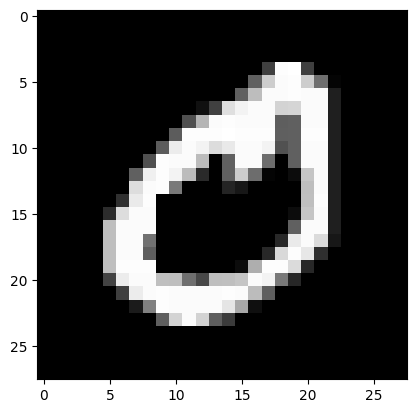

In [10]:
# Inspect the dataset

# Shapes
print(f"X_train.shape: {X_train.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y_test.shape: {y_test.shape}")
print("")

# Show an example image and the corresponding label
idx = 21
fig, ax = plt.subplots()
ax.imshow(X_train[idx], cmap="gray")
print(f"Image {idx} label: {y_train[idx]}")

In [11]:
# Encode the targets

enc = OneHotEncoder()
enc.fit(y_train)

# Reshape the image size
y_train = enc.transform(y_train).reshape((-1, 10)).todense()
y_test = enc.transform(y_test).reshape((-1, 10)).todense()

print(f"y_train.shape: {y_train.shape}")
print(f"y_test.shape: {y_test.shape}")
print("")

print(f"Image {idx} label: {y_train[idx]}")


y_train.shape: (60000, 10)
y_test.shape: (10000, 10)

Image 21 label: [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [12]:
# Create the model

flattening_layer = layers.Flatten()

# Normalise the data using a normalisation layer
normalisation_layer = layers.Normalization(axis=-1)
normalisation_layer.adapt(flattening_layer(X_train))

model = keras.Sequential([
    keras.Input(shape=(28, 28)),
    flattening_layer,
    normalisation_layer,
    layers.Dense(20, activation="relu"),
    # Number of neurons matches the number of classes
    layers.Dense(10, activation="softmax"),
])

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"],
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 normalization_1 (Normalizat  (None, 784)              1569      
 ion)                                                            
                                                                 
 dense_2 (Dense)             (None, 20)                15700     
                                                                 
 dense_3 (Dense)             (None, 10)                210       
                                                                 
Total params: 17,479
Trainable params: 15,910
Non-trainable params: 1,569
_________________________________________________________________


In [7]:
# Train the model

# Use early stopping to prevent overfitting

es = keras.callbacks.EarlyStopping(
    # Monitor validation loss 
    monitor="val_loss",
    min_delta=0.01,
    patience=2,
    verbose=1,
    mode="min",
    restore_best_weights=True,
)

# Train
history = model.fit(
    X_train,
    y_train,
    batch_size=16,
    epochs=10,
    verbose=2,
    callbacks=es,
    validation_split=0.15,
)

Epoch 1/10
3188/3188 - 9s - loss: 0.3486 - accuracy: 0.9033 - val_loss: 0.2183 - val_accuracy: 0.9423 - 9s/epoch - 3ms/step
Epoch 2/10
3188/3188 - 8s - loss: 0.2388 - accuracy: 0.9409 - val_loss: 0.2259 - val_accuracy: 0.9463 - 8s/epoch - 2ms/step
Epoch 3/10
3188/3188 - 7s - loss: 0.2226 - accuracy: 0.9464 - val_loss: 0.2322 - val_accuracy: 0.9484 - 7s/epoch - 2ms/step
Epoch 4/10
3188/3188 - 8s - loss: 0.2045 - accuracy: 0.9519 - val_loss: 0.2382 - val_accuracy: 0.9478 - 8s/epoch - 2ms/step
Epoch 5/10
3188/3188 - 8s - loss: 0.1996 - accuracy: 0.9532 - val_loss: 0.2670 - val_accuracy: 0.9467 - 8s/epoch - 2ms/step
Epoch 6/10
3188/3188 - 8s - loss: 0.1937 - accuracy: 0.9553 - val_loss: 0.2583 - val_accuracy: 0.9516 - 8s/epoch - 2ms/step
Epoch 7/10
3188/3188 - 7s - loss: 0.1874 - accuracy: 0.9567 - val_loss: 0.2720 - val_accuracy: 0.9508 - 7s/epoch - 2ms/step
Epoch 8/10
3188/3188 - 8s - loss: 0.1808 - accuracy: 0.9585 - val_loss: 0.2946 - val_accuracy: 0.9477 - 8s/epoch - 3ms/step
Epoch 9/

In [ ]:
# Examine the training


def add_metric(axs, column, history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history["val_" + metric]
    epochs = range(1, len(train_metrics) + 1)
    
    axs[column].plot(epochs, train_metrics)
    axs[column].plot(epochs, val_metrics)
    axs[column].set_title("Training and validation " + metric)
    axs[column].set_xlabel("Epochs")
    axs[column].set_ylabel(metric)
    axs[column].legend(["train_" + metric, "val_" + metric])
    
# Create the figure and add metrics
fig, axs = plt.subplots(1, 2, figsize=(16,8))
add_metric(axs, 0, history, "loss")
add_metric(axs, 1, history, "accuracy")

In [ ]:
# Evaluate the model

model.evaluate(X_test, y_test)

In [ ]:
# Test the model with own handwriting


file = "test_4.png"
#Build in function in keras + properties
img = keras.utils.load_img(
    file,
    color_mode="grayscale",
    interpolation="bilinear",
    target_size=(28,28),
)

# Invert the colors, as this is how the training set is
img = PIL.ImageOps.invert(img)

# Convert the image into numpy array -> network understands this
img_array = keras.utils.img_to_array(
    img, 
    data_format="channels_first",
)

# Visualise
print(f"img_array.shape: {img_array.shape}")
fig, ax = plt.subplots()
ax.imshow(img_array[0], cmap="gray")

# Make the prediction
pred = model.predict(img_array)

# The predicted label is the one with the highest probability
pred_label = np.argmax(pred, axis=1)
print(f"pred: {pred}")
print(f"pred_label: {pred_label}")